# Lesson 6 Review and Lesson 7 Prework

## Lesson 6 Review and Coding Tips
1. Machine Learning w/ coding: Linear Regression and Regularization with Patsy, Train-Test-Split, GridSearchCV, GradientDescent, Cross Validation, Feature Selection

## Lesson 7 Topics
1. Classification Models
2. kNN (K-Nearest Neighbors) with sklearn
3. Confusion Matrix

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Lesson 6 Review and Coding Tips

### Patsy

Patsy is a simple way to split your data up into target and predictor values. It is very similar to statsmodel's OLS parameter formula. It is a handy way to add/remove features with ease. The generic formula of how to use patsy is below:

```
formula = 'target ~ predictor1 + predictor2 + predictor3 + predictor4 ... + predictor100 - 1'
y, X    = patsy.dmatrices(formula, df=df, return_type='dataframe')
```

Since patsy changes y into a 2D array/dataframe, you have to change y into a 1D array/list. There are several ways to do it shown below.

```
y = y.values.ravel()
y = df['target']
```

Next, I'll show you an example below on how to use patsy.

In [24]:
import patsy

In [25]:
df = pd.read_csv('/Users/melaniequalls/Desktop/DataScienceGA/DS-SF-32/dataset/bikeshare.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
formula = 'registered ~ temp + hum + cnt'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')

In [27]:
# y is now a 2D dataframe, we need to squish it back into a 1D array/list
y.head()

,registered
0,13.0
1,32.0
2,27.0
3,10.0
4,1.0


In [28]:
y = y.values.ravel()
y

array([ 13.,  32.,  27., ...,  83.,  48.,  37.])

In [29]:
X.head()

,Intercept,temp,hum,cnt
0,1.0,0.24,0.81,16.0
1,1.0,0.22,0.80,40.0
2,1.0,0.22,0.80,32.0
3,1.0,0.24,0.75,13.0
4,1.0,0.24,0.75,1.0


### Train_Test_Split
Train-Test split is one of the most important tools to use when running any modeling. It breaks down our entire dataset into 2 sections, a training set and a testing set. We use the training set to train our model with an algorithm and then use that algorithm to run on our testing set to make sure that our results is consistent and stable. Another way to think about it is this.

We have 100 rows of data. Usually, we want the training set to be much larger than the testing set. I usually use 75-25 split. We will allocate 75% of the data to the training set (completely at random) and 25% of the data to the testing set (whatever is left).

It would be a decent 5-7 liner of code if we had to write a training/test function each time, but sklearn's package comes with a train_test_split function!

```
from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75) # Can also use test_size
print trainX.shape, testX.shape
print trainY.shape, trainY.shape
# trainX and testX should be a data from like (1000,15)
# trainY and testY should be a 1D array or list like (1000,)
```

Another thing to mention that sklearn's train_test_split offers is stratify, which we will use for classification problems. Suppose our target variable is categorical with 0s and 1s, it would be problematic if our train_test_split put all the 0s or all the 1s in the training set with none in the testing set. Stratifying makes sure that there's an equal amount in the training set and the testing set!

Below is an example!

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
# Continuing from where we left off in patsy!
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(13034, 4) (4345, 4)
(13034,) (4345,)


### GridSearchCV

We talked about GridSearch in class, so I won't go into it much. GridSearchCV is just Grid Search Cross Validation. The goal of GridSearching is to optimize our parameters.

Below is a continuation from our train_test_split.

In [32]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression

In [33]:
# First, we setup our GridSearch parameters for our linear regression
search_parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Initialize a blank model object
lr = LinearRegression()

# Initialize gridsearch! Verbose shows you what is happening in text.
estimator = GridSearchCV(lr, search_parameters, cv=5, verbose=1, n_jobs=4)

# Fit the data from our train_test_split
results = estimator.fit(trainX, trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


In [34]:
results.best_score_

0.9520329975598822

In [35]:
results.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [36]:
results.best_params_

{'fit_intercept': True, 'normalize': True}

### Gradient Descent
We talked about Gradient Descent in class, so I won't go deep into this as well. Generally speak, Gradient Descent is a tool to optimize your coefficients and score. How I imagine it is if you put a ping pong ball in a bowl and let it roll, the ball will end up near the center of the bowl.

There are 2 types of Gradient Descent: Batch Gradient Descent and Stochastic Gradient Descent
1. Batch Gradient Descent - BGD does the gradient descent on the whole dataset. As you can imagine, this will take a long time! BGD always takes the steepest route to reach the true input distribution. In practice, nobody uses Batch Gradient Descent because it is too computationally expensive for little gain, but it is good to know what it is.
2. Stochastic Gradient Descent - SGD computes the gradient by using a single sample. As you can imagine, with a single sample there will be more noise, but doing SGD in minibatches (multiple samples), the gradient can be jerked out of local minimum and into the global minimum. SGD choose a random point and then routes to the steepest gradient. SGD is computationally faster.

Below is an example of how to use SGD.
```
from sklearn.linear_model import SGDRegressor

sgd_params = {
    'loss':['squared_loss'],
    'penalty':['l1','l2'],
    'alpha':np.linspace(0.01, 10000, 100)
}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=5, verbose=2)
```

Gradient Descent uses GridSearchCV to find the most optimized parameters.

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [38]:
# A necessary step when performing regularization, must be normalized
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [39]:
trainX_n, testX_n, trainY, testY = train_test_split(Xn, y, train_size=0.75)
print trainX_n.shape, testX_n.shape
print trainY.shape, testY.shape

(13034, 4) (4345, 4)
(13034,) (4345,)


In [40]:
# Set SGD params. How to optimize the param will be experience, so it is good to play around with it
sgd_params = {
    'loss':['squared_loss'],
    'penalty':['l1', 'l2'], # L1 is Lasso, L2 is Ridge
    'alpha':np.linspace(0.01, 10000, 100)
}

# Initialize a blank model object
sgd_reg = SGDRegressor()

# Initialize GridsearchCV params
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=5, verbose=1)

# Fit data
sgd_results = sgd_reg_gs.fit(trainX_n, trainY)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.3s finished


In [41]:
sgd_results.best_score_

0.9499937807139925

In [42]:
sgd_results.best_params_

{'alpha': 0.01, 'loss': 'squared_loss', 'penalty': 'l1'}

In [43]:
sgd_results.best_estimator_

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

### Cross Validation

I think visually, this might make more sense.
```
First iteration  = [Train, Train, Train, Train, Test]
Second iteration = [Train, Train, Train, Test, Train]
Third iteration  = [Train, Train, Test, Train, Train]
Fourth iteration = [Train, Test, Train, Train, Train]
Fifth iteration  = [Test, Train, Train, Train, Train]
```
The data will be broken into 5 chunks and every 25% chunk will get a chance to be the testing set.

In [44]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

Cross-validated scores: [ 0.92911995  0.92302038  0.92965986  0.93819754  0.95816672  0.96243613
  0.91737901  0.94639364  0.9538717   0.95702314]
Mean Scores:  0.941526806467


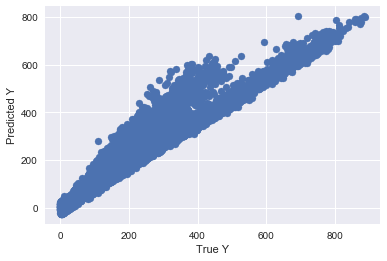

In [45]:
# Create a new empty object with the best parameters from GridSearchCV
sgd_reg_model = SGDRegressor(alpha=0.01, loss='squared_loss', penalty='l1')

# Find the MSE and the mean of all 10 MSE
scores = cross_val_score(sgd_reg_model, Xn, y, cv=10)
print 'Cross-validated scores:', scores
print 'Mean Scores: ', scores.mean()

# Similar to model.predict, but with cross validation and a plot of true Y by predicted Y
predictions = cross_val_predict(sgd_reg_model, Xn, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()

### Feature Selection
Feature Selection is looking at the individual weights for each feature and seeing their relationship with the target variable. The closer to 0, the weaker the effect of the predictor feature is. The higher in positive or negative value (goes either way), the stronger the feature has a relationship with the predictor.

In [46]:
# SGD feature importance results
# Create a feature and their importances (coefficients) in a dataframe
feature_importance = pd.DataFrame({'feature':X.columns, 
                                   'importance':sgd_results.best_estimator_.coef_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
3,cnt,153.925901
2,hum,5.863132
0,Intercept,0.000000
1,temp,-11.834286


In [47]:
# Linear Regression feature importance results
# Create a feature and their importances (coefficients) in a dataframe
feature_importance = pd.DataFrame({'feature':X.columns, 
                                   'importance':results.best_estimator_.coef_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
2,hum,39.773738
3,cnt,0.851057
0,Intercept,0.000000
1,temp,-58.857474


# Lesson 7 Prework

### Classification Models
Classification Models are models predicting categorical variables. For example, with given predictor variables, is the next person a male or female? Is the next pet animal a dog or a cat?

Here are some classification models:
1. kNN (k-Nearest Neighbors)
2. Logistic Regression
3. Decision Tree Classifier
4. Supper Vector Classifier
5. Naive Bayes Classifier

We will start with the most basic classifier, kNN.

### kNN (k-Nearest Neighbors) with sklearn

kNN is a lazy model classifier. It runs very fast and efficient, but not very intuitive.

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights=['uniform', 'distance'])
```

It only has 2 parameters, which you can play around with.
1. n_neighbors - If n_neighbors=5, then based on old data and where the new point lies in the old data, the closest 5 data points will decide what the new data point is. Generally speaking, you want this to be an old number.
2. weights - if n_neighbors=5, Uniform says that each one of those points, regradless if they are categorical value 0 or 1, they are all equal. Distance says that the closer the points are to the new data point, kNN puts a heavier weight value (euclidean distance) on those points.

It might be easier visualizing it:
http://3.bp.blogspot.com/-ZslDMqm5M9o/T8ja_f_fALI/AAAAAAAAAt4/z7w55YAZXpw/s1600/p1.png

Below is an example of kNN, I used an affair dataset, which I put in the review and prework folder called review_datasets. I will put datasets I used exclusive from Reid's dataset folder.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
affairs = pd.read_csv('/Users/melaniequalls/Desktop/DataScienceGA/DS-SF-32/review and prework/review_datasets/affair.csv')

In [50]:
affairs.head(3)

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.0,no,3,18,7,4,0
1,2,female,27.0,4.0,no,4,14,6,4,0
2,3,female,32.0,15.0,yes,1,12,1,4,0


In [51]:
# First, we need sex, child and nbaffairs (number of affairs) into categorical values.
# I'll show you 2 ways of doing it.

# Option 1: Write a function that whenever number of affairs == 0, that person didn't have affairs and any number greater
# than 1 equates to having an affair
def binary_affair(x):
    if x == 0:
        return 0
    else:
        return 1

# No need to write any loops because when you data[series].map(function), the .map will take each value 1 by 1,
# like a loop.
affairs['had_affair'] = affairs['nbaffairs'].map(binary_affair)

# Option 2: Since we don't need to create new columns for sex and child, we can just replace the values into 0 and 1.
affairs.sex = affairs.sex.map(lambda x: 1 if x == 'male' else 0)
affairs.child = affairs.child.map(lambda x: 1 if x == 'yes' else 0)

In [52]:
affairs.head(3)

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,had_affair
0,1,1,37.0,10.0,0,3,18,7,4,0,0
1,2,0,27.0,4.0,0,4,14,6,4,0,0
2,3,0,32.0,15.0,1,1,12,1,4,0,0


##### I am going to run a basic kNN. As practice, try to use everything we've learned from above and create your own modeling.

In [80]:
# define maxtrix variables, X, that explain target y
X = affairs[['age', 'religious', 'education']]
y = affairs['had_affair'].values

In [94]:
#define learning model. play with k and weights (distance, uniform)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

#fit the model
knn_model = knn.fit(X, y)

#predict response
knn_predict = knn_model.predict(X)

# predict accuracy
knn_score = knn_model.score(X, y)
knn_score

0.82362728785357742

### 1. Train_Test_Split

In [97]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(450, 3) (151, 3)
(450,) (151,)


### 2. GridSearchCV

In [125]:
# First, we setup our GridSearch parameters for model

k = np.arange(10)+1
search_parameters = {
    'n_neighbors': k,
    'weights': ['uniform', 'distance']
}

# Initialize gridsearch! Verbose shows you what is happening in text.
estimator = GridSearchCV(knn, search_parameters, cv=5, verbose=1, n_jobs=4)

# Fit the data from our train_test_split
results = estimator.fit(trainX, trainY)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [126]:
results.best_score_


0.7288888888888889

In [127]:
results.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [128]:
results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

### 3. kNN Modeling

In [129]:
x = affairs[['education', 'religious', 'age']]
y = affairs['had_affair'].values

#use best parameter in from GridSearchCV?
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')

knn_model = knn.fit(x, y)
knn_predict = knn_model.predict(x)
knn_score = knn_model.score(x, y)
knn_score

0.7703826955074875

### 4. Cross Validation

Cross-validated scores: [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -7.80819134e+20
   0.00000000e+00   0.00000000e+00]
Mean Scores:  -7.80819133999e+19


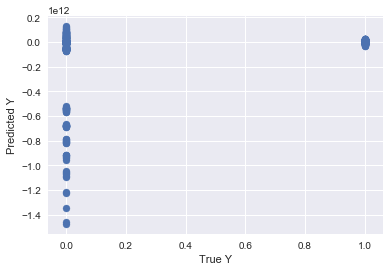

In [136]:
# FIX: THIS ISN'T CORRECT
# Create a new empty object with the best parameters from GridSearchCV
sgd_reg_model = SGDRegressor(alpha=0.01, loss='squared_loss', penalty='l1')

# Find the MSE and the mean of all 10 MSE
scores = cross_val_score(sgd_reg_model, x, y, cv=10)
print 'Cross-validated scores:', scores
print 'Mean Scores: ', scores.mean()

# Similar to model.predict, but with cross validation and a plot of true Y by predicted Y
predictions = cross_val_predict(sgd_reg_model, x, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()

### Confusion Matrix

For all classification results, the most useful tool to look at is a confusion matrix. Confusion matrix is similar to when we were talking about Type 1 and Type 2 errors. The confusion matrix looks something like this: http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png

How do we use a confusion matrix to see how well our model is doing? There are a couple of simplistic formulas we can do to help us figure out how well our model did.

*** number of test examples*** _n_ = _tp_  +  _tn_  +  _fp_  +  _fn_ 

***Accuracy:*** In general how often is the classifier correct? => ( _tp_ + _tn_ )  /  _n_

***Misclassification Rate (Error Rate):*** How often is the model wrong =>   _fp_ + _fn_ / _n_
 
***Precision:*** When the model predicts "yes", how often is it correct? => _tp_ / ( _tp_  +  _fp_ )

***Recall / True Positive Rate:*** How often the model predicts yes, when it's actually yes => _tp_ / ( _tp_ + _fn_ )

The good thing is, sklearn provides us with almost all of these information and a confusion matrix :)

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### I will be performing a classification report and a confusion matrix with the simple kNN I did.

In [138]:
print classification_report(y, knn_predict, target_names=['no affair', 'had affair'])

             precision    recall  f1-score   support

  no affair       0.77      0.99      0.87       451
 had affair       0.75      0.12      0.21       150

avg / total       0.77      0.77      0.70       601



##### Why is there f1-score and support?!
1. F1-Score is the harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once.

```
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
```

2. Support is simply the number of observations for each class

In [130]:
print confusion_matrix(y, knn_predict)

[[450   1]
 [143   7]]


In [136]:
# Accuracy
acy = (450. + 7) / 601
print acy

0.760399334443


In [137]:
# Error
mis = (143. + 1) / 601
print mis

0.239600665557


##### This below code is half borrowed, half edited (mainly to get the tickmarks to not screw up when the target value is not a binomial distribution). Feel free to use it.

Confusion matrix, without normalization
[[445   6]
 [132  18]]


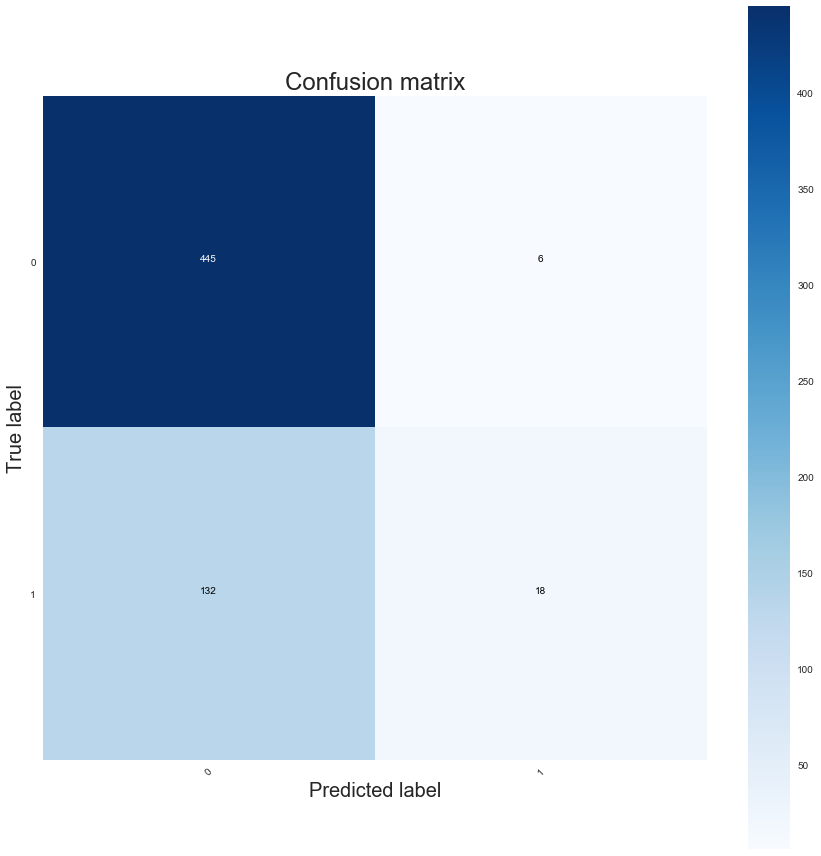

In [139]:
import itertools
from itertools import cycle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

np.set_printoptions(precision=2)

cnf_mtx = confusion_matrix(y, knn_predict)
class_names = affairs['had_affair'].unique()

plot_confusion_matrix(cnf_mtx, classes=class_names,
                      title='Confusion matrix')

plt.show()

### 5. Write your own classification report and confusion matrix. Is your model doing a good job?